In [1]:
# !pip install --no-index ../input/global-wheels/cellpose-0.7.2-py3-none-any.whl --find-links=../input/global-wheels/

In [2]:
import numpy as np
# from cellpose import models, io, plot
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

In [3]:
!rm -rf ./cell_dataset/

In [4]:
os.makedirs("./cell_dataset/train/")
os.makedirs("./cell_dataset/test/")

# changing training mask:

In [5]:
"""
1. convert the masks into single channel image
2. then try running the model
3. convert the min and max values in the mask between 0-73
"""

'\n1. convert the masks into single channel image\n2. then try running the model\n3. convert the min and max values in the mask between 0-73\n'

In [6]:
#  '757253a07cd3_masks.tif'.split(".")[0][-6:-1]

In [7]:
train_dir = "../input/cell-data-20211207/cell_dataset/train/"
train_mask = [i for i in os.listdir("../input/cell-data-20211207/cell_dataset/train") if i.split(".")[0][-6:-1] == "_mask"]
# (cv2.imread(train_mask[1],0))
dest_train = "./cell_dataset/train/"
for i in tqdm(range(len(train_mask))):
    img_path = train_dir + train_mask[i]
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    img = np.clip(img,0,73)
    filename = dest_train + train_mask[i]
    cv2.imwrite(filename, img)
#     print(f"saved {filename}")

100%|██████████| 484/484 [00:05<00:00, 85.42it/s]


In [8]:
len(os.listdir("./cell_dataset/train/"))

484

In [9]:
np.unique(plt.imread("./cell_dataset/train/0140b3c8f445_masks.tif"))

array([ 0, 73], dtype=uint8)

(520, 704)


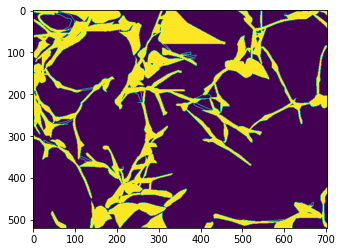

In [10]:
plt.imshow(cv2.imread("./cell_dataset/train/0140b3c8f445_masks.tif",cv2.IMREAD_UNCHANGED))
print(cv2.imread("./cell_dataset/train/0140b3c8f445_masks.tif",cv2.IMREAD_UNCHANGED).shape)

In [11]:
# plt.imshow(cv2.imread("../input/cell-data-20211207/cell_dataset/train/0140b3c8f445_masks.tif",cv2.IMREAD_UNCHANGED))
# print(cv2.imread("../input/cell-data-20211207/cell_dataset/train/0140b3c8f445_masks.tif",cv2.IMREAD_UNCHANGED).shape)

In [12]:
train_dir = "../input/cell-data-20211207/cell_dataset/train/"
train_img = [i for i in os.listdir("../input/cell-data-20211207/cell_dataset/train") if i.split(".")[0][-6:-1] != "_mask"]

# plt.imshow(cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR))
# cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR)
# cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR).shape

dest_train = "./cell_dataset/train/"


for i in tqdm(range(len(train_img))):
    img_path = train_dir + train_img[i]
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    filename = dest_train + train_img[i]
    cv2.imwrite(filename, img)

100%|██████████| 484/484 [00:10<00:00, 47.04it/s]


(520, 704)


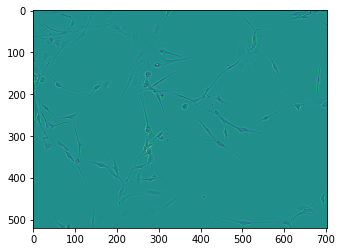

In [13]:
plt.imshow(cv2.imread("./cell_dataset/train/0140b3c8f445.tif",cv2.IMREAD_UNCHANGED))
print(cv2.imread("./cell_dataset/train/0140b3c8f445.tif",cv2.IMREAD_UNCHANGED).shape)

0df9d6419078.tif 0df9d6419078_masks.tif


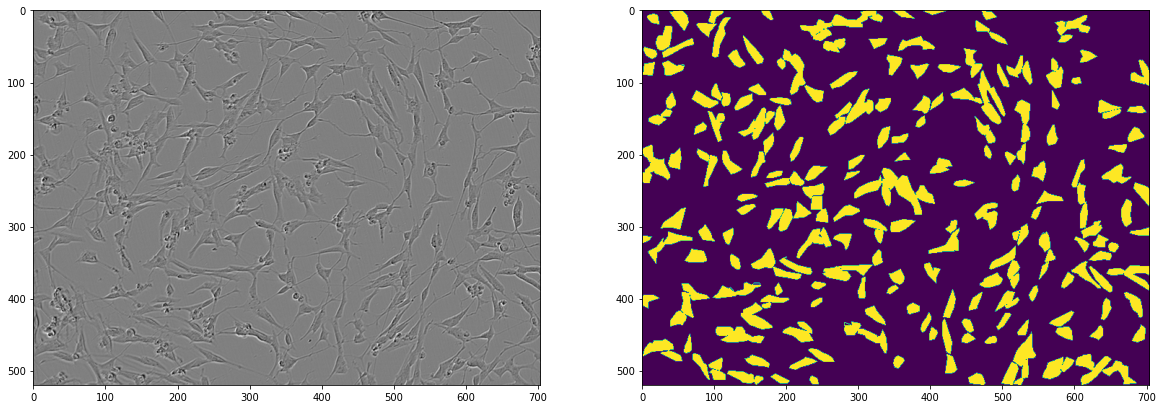

In [14]:
plt.figure(figsize=(20,22))
print(sorted(train_img)[23], sorted(train_mask)[23])
plt.subplot(1,2,1)
temp_img = cv2.imread(dest_train + sorted(train_img)[23],cv2.IMREAD_COLOR)
plt.imshow(temp_img)
plt.subplot(1,2,2)
temp_mask = cv2.imread(dest_train + sorted(train_mask)[23],0)
plt.imshow(temp_mask)

In [15]:
len(os.listdir(dest_train))

968

In [16]:
# !ls ./cell_dataset/train/

# preprocessing test data:

In [17]:
test_dir = "../input/cell-data-20211207/cell_dataset/test/"
test_mask = [i for i in os.listdir(test_dir) if i.split(".")[0][-6:-1] == "_mask"]
# (cv2.imread(train_mask[1],0))

dest_test = "./cell_dataset/test/"
for i in tqdm(range(len(test_mask))):
    img_path = test_dir + test_mask[i]
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    img = np.clip(img,0,73)
    filename = dest_test + test_mask[i]
    cv2.imwrite(filename, img)
#     print(f"saved {filename}")

100%|██████████| 122/122 [00:01<00:00, 90.18it/s]


In [18]:
# train_dir = "../input/cell-data-20211207/cell_dataset/train/"
test_img = [i for i in os.listdir(test_dir) if i.split(".")[0][-6:-1] != "_mask"]

# plt.imshow(cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR))
# cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR)
# cv2.imread(os.path.join(train_dir, train_img[1]),cv2.IMREAD_COLOR).shape

dest_test= "./cell_dataset/test/"

for i in tqdm(range(len(test_img))):
    img_path = test_dir + test_img[i]
    img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    filename = dest_test + test_img[i]
    cv2.imwrite(filename, img)

100%|██████████| 122/122 [00:02<00:00, 46.59it/s]


In [19]:
len(os.listdir(dest_test))

244

In [20]:
# !ls ./cell_dataset/train/

In [21]:
# !ls ./cell_dataset/test/

026b3c2c4b32.tif 026b3c2c4b32_masks.tif
(520, 704)
(520, 704)


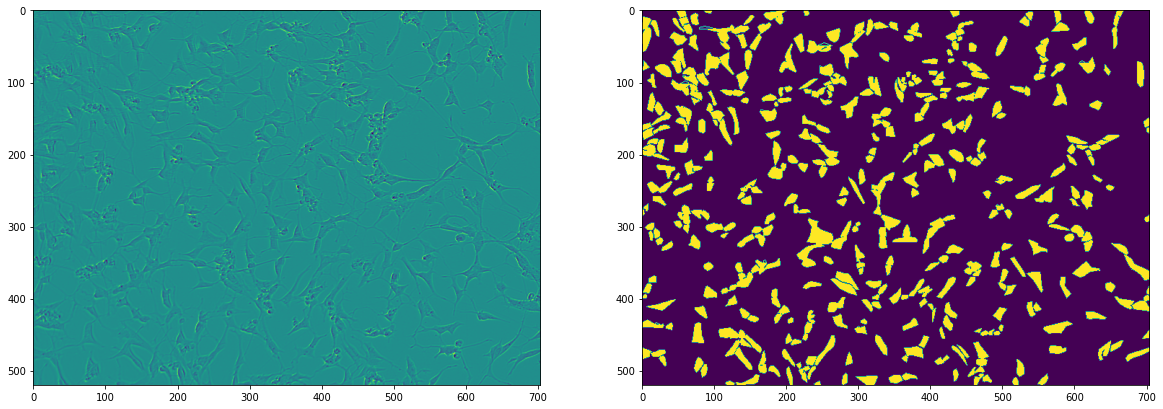

In [22]:
plt.figure(figsize=(20,22))
print(sorted(train_img)[2], sorted(train_mask)[2])
plt.subplot(1,2,1)
temp_img = plt.imread(dest_test + sorted(test_img)[23])
print(temp_img.shape)
plt.imshow(temp_img)

plt.subplot(1,2,2)
temp_mask = plt.imread(dest_test + sorted(test_mask)[23])
print(temp_mask.shape)
plt.imshow(temp_mask)

In [23]:
np.unique(temp_mask)
# plt.imshow()

array([ 0, 73], dtype=uint8)

# prepering small chunk of data for testing

In [24]:
os.makedirs("./cell_dataset_short/train/")
os.makedirs("./cell_dataset_short/test/")

In [25]:
import shutil

src= "./cell_dataset/train/"
dest = "./cell_dataset_short/train/"

# all_files = os.listdir(src)[0:568]
demo_img = sorted([i for i in os.listdir(src) if i.split(".")[0][-6:-1] != "_mask"])[0:200]
demo_mask= sorted([i for i in os.listdir(src) if i.split(".")[0][-6:-1] == "_mask"])[0:200]

# len(demo_img), len(demo_mask)
# for i in range(200):
#     print(f"img ---> {demo_img[i]} and Mask  ---> {demo_mask[i]}")

all_train_data = demo_img + demo_mask

for file in tqdm(all_train_data):
    shutil.copy2(os.path.join(src,file),dest)

100%|██████████| 400/400 [00:00<00:00, 2804.11it/s]


In [26]:
# !ls $dest

In [27]:
import shutil

src= "./cell_dataset/test/"
dest = "./cell_dataset_short/test/"

# all_files = os.listdir(src)[0:568]
demo_img = sorted([i for i in os.listdir(src) if i.split(".")[0][-6:-1] != "_mask"])[0:60]
demo_mask= sorted([i for i in os.listdir(src) if i.split(".")[0][-6:-1] == "_mask"])[0:60]

# len(demo_img), len(demo_mask)
# for i in range(200):
#     print(f"img ---> {demo_img[i]} and Mask  ---> {demo_mask[i]}")

all_train_data = demo_img + demo_mask

for file in tqdm(all_train_data):
    shutil.copy2(os.path.join(src,file),dest)

100%|██████████| 120/120 [00:00<00:00, 2832.39it/s]


In [28]:
# !ls $dest

In [29]:
# len(os.listdir("./cell_dataset/test/"))/2

# model training:

In [30]:
# import shutil
# import os
# cell_dir_path = './cell'
# if os.path.exists(cell_dir_path):
#     shutil.rmtree(cell_dir_path)
# shutil.copytree("../input/cell-data-20211207/cell_dataset", "./cell")

In [31]:
# !python -m cellpose \
# --train \
# --use_gpu \
# --dir "./cell_dataset/train" \
# --test_dir "./cell_dataset/test" \
# --n_epochs 10 \
# --learning_rate 0.02 \
# --pretrained_model cyto2torch_3

In [32]:
# uyguygygyugiyiguyguyguyguygyguyguyguygugyguygyguygguyuguyuguyggiuygguyguyguygu

In [33]:
# model_file = "/kaggle/working/cell_dataset/train/models/" + os.listdir("/kaggle/working/cell_dataset/train/models/")[0]
# model_file

In [34]:
# def rle_encode(img):
#     pixels = img.flatten()
#     pixels = np.concatenate([[0], pixels, [0]])
#     runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
#     runs[1::2] -= runs[::2]
#     return ' '.join(str(x) for x in runs)

# test_dir = "../input/sartorius-cell-instance-segmentation/test/"
# test_img_dirs = [test_dir + i for i in os.listdir(test_dir)]


# test_imgs = []
# for i in test_img_dirs:
#     img = cv2.imread(i,cv2.IMREAD_COLOR)
#     test_imgs.append(img)
# # test_files = [fname for fname in test_dir.iterdir()]
# # print(test_files)
# # print(cv2.imread(str(test_files[0])).shape)
# # plt.imshow(io.imread(str(test_files[0])))
# # model = models.CellposeModel(gpu=True, pretrained_model='./cellpose_residual_on_style_on_concatenation_off_train_2021_12_08_07_16_13.734155')
# # latest_file = "./cellpose_residual_on_style_on_concatenation_off_train_2021_12_08_07_16_13.734155"
# model = models.CellposeModel(gpu=True, pretrained_model=model_file, torch=True, diam_mean=30.0, net_avg=True, device=None, residual_on=True, style_on=True, concatenation=False)

In [35]:
# masks_all = []
# styles_all = []
# flows_all = []


# for img in test_imgs:
#     chan = [0,0] # for black and white imgs
#     #img = io.imread(filename)
#     masks, flows, styles = model.eval(img, diameter=60, channels=chan)

#     masks_all.append(masks)
#     flows_all.append(flows)
#     styles_all.append(styles)

# # DISPLAY RESULTS

#     fig = plt.figure(figsize=(12,5))
#     plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
#     plt.tight_layout()
#     plt.show()


# #model = models.Cellpose(gpu=False, model_type='cyto')
# #model = models.Cellpose(gpu=True, model_type='cyto')


